In [244]:
import json
import matplotlib.pyplot as plt

In [382]:
# info_path = ('../trained_models/env.virtualhome/task.find-numproc.1-obstype.full-sim.unity/'
#              'mode.RL-algo.a2c-attention.linear-gamma.0.95-lr1e-05/log.json')

#info_path = ('../trained_models/env.virtualhome/task.find-numproc.1-obstype.full-sim.unity/taskset.setup_table/mode.RL-algo.a2c-attention.linear-gamma.0.95-lr1e-05/log.json')
info_path = ('../trained_models/env.virtualhome/task.find-numproc.1-obstype.full-sim.unity/taskset.full/mode.RL-algo.a2c-attention.linear-gamma.0.95-lr1e-05/log.json')


In [383]:
with open(info_path, 'r') as f:
    content = json.load(f)

In [384]:
content[0].keys()

dict_keys(['success', 'reward', 'script', 'target', 'info_step'])

In [385]:
def get_target_obj(info_elem):
    return (info_elem['target'][1][0][0]['class_name'])



## Success over episode

In [386]:
obj_and_success = [(get_target_obj(elem), elem['success']) for elem in content]

In [387]:
different_classes = set([x[0] for x in obj_and_success])

In [388]:
success_per_class = {x: [0] for x in different_classes}
cnt_per_class = {x: [0] for x in different_classes}
for item in obj_and_success:
    for cn in different_classes:
        last_el = success_per_class[cn][-1]
        last_elct = cnt_per_class[cn][-1]
        if item[0] == cn:
            cnt_per_class[cn].append(last_elct + 1)
        else:
            cnt_per_class[cn].append(last_elct)
            
        if item[0] != cn or not item[1]:
            success_per_class[cn].append(last_el)
        else:
            success_per_class[cn].append(last_el + 1)


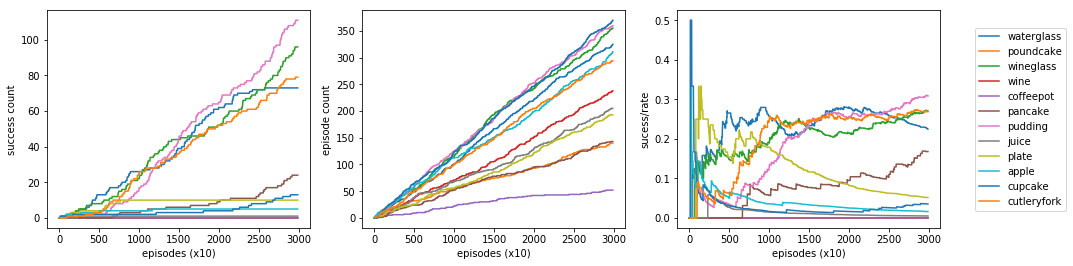

In [389]:
plt.figure(figsize=(16,4))
ax = plt.subplot(1,3,1)
for cn in different_classes:
    ax.plot(success_per_class[cn], label=cn)
    ax.set_ylabel('success count')
    ax.set_xlabel('episodes (x10)')
    
ax = plt.subplot(1,3,2)
for cn in different_classes:
    ax.plot(cnt_per_class[cn], label=cn)
    ax.set_ylabel('episode count')
    ax.set_xlabel('episodes (x10)')

    
ax = plt.subplot(1,3,3)
import numpy as np
for cn in different_classes:
    perc = [x*1.0/(y+1e-9) for x,y in zip(success_per_class[cn], cnt_per_class[cn])]
    ax.plot(perc, label=cn)
    ax.set_ylabel('sucess/rate')
    ax.set_xlabel('episodes (x10)')
    
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

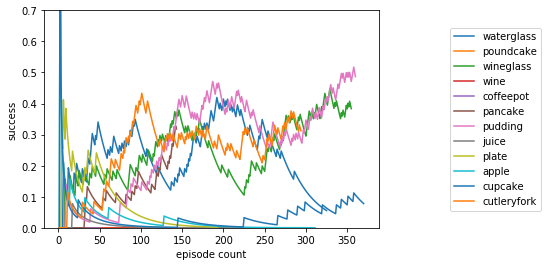

In [390]:
def raverage(ssit, alpha):
    values = [ssit[0]]
    ravg = values[0]
    for it in range(1, len(ssit)):
        ravg = (1-alpha) * ssit[it] + (alpha) * ravg
        dw = 1.0 - np.power(alpha, it)
        val = ravg / (dw)
        values.append(val)
    return values
    

from scipy.ndimage.filters import gaussian_filter
plt.plot()
ax = plt.subplot(1,1,1)
alpha = 0.97
sigma = 5
for cn in different_classes:
    cc = cnt_per_class[cn]
    ss = success_per_class[cn]
    it_change = [it for it in range(1, len(cc)) if cc[it] != cc[it-1]]
    ccit = [cc[i] for i in it_change]
    ssit = [ss[i] for i in it_change]
    ssit = [1.0*ssit[i] if i == 0 else ssit[i] - ssit[i-1] for i in range(len(ssit))]
    ssit = raverage(ssit, alpha)
    #ssit = gaussian_filter(ssit, sigma)
    ax.plot(ccit, ssit, label=cn)
    ax.set_ylabel('success')
    ax.set_ylim((0.0, 0.7))
    ax.set_xlabel('episode count')
    
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

In [368]:
ssit

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.21236536362457953,
 0.17422229122507404,
 0.1470024903130429,
 0.1266097074698232,
 0.1107682427547478,
 0.09811267298230074,
 0.08777408957727029,
 0.07917321750404765,
 0.07190901776858885,
 0.06569503170668724,
 0.06032118755825808,
 0.05562992957748368,
 0.051500772164032,
 0.047840002618243414,
 0.044573635658802485,
 0.041642481586003775,
 0.03899862354205916,
 0.036602855519366886,
 0.09398280864436453,
 0.14639587920730993,
 0.13815635207883623,
 0.1305796996184547,
 0.12359213846597296,
 0.11713042154172036,
 0.1622830118689073,
 0.15415521920159433,
 0.14658650985703842,
 0.1877021597045081,
 0.17882051760440287,
 0.17050317236831036,
 0.1627015086504407,
 0.15537230745079902,
 0.1484770170184349,
 0.1857311971139105,
 0.17771566051875667,
 0.212741871743341,
 0.20379259756266774,
 0.19532199593765523,
 0.18729628911746932,
 0.17968476447503223,
 0.21267058034838807,
 0.24400998748841207,
 0.2738097614126075,
 0.26311737359415144,
 0.252934685

In [369]:
ssit

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.21236536362457953,
 0.17422229122507404,
 0.1470024903130429,
 0.1266097074698232,
 0.1107682427547478,
 0.09811267298230074,
 0.08777408957727029,
 0.07917321750404765,
 0.07190901776858885,
 0.06569503170668724,
 0.06032118755825808,
 0.05562992957748368,
 0.051500772164032,
 0.047840002618243414,
 0.044573635658802485,
 0.041642481586003775,
 0.03899862354205916,
 0.036602855519366886,
 0.09398280864436453,
 0.14639587920730993,
 0.13815635207883623,
 0.1305796996184547,
 0.12359213846597296,
 0.11713042154172036,
 0.1622830118689073,
 0.15415521920159433,
 0.14658650985703842,
 0.1877021597045081,
 0.17882051760440287,
 0.17050317236831036,
 0.1627015086504407,
 0.15537230745079902,
 0.1484770170184349,
 0.1857311971139105,
 0.17771566051875667,
 0.212741871743341,
 0.20379259756266774,
 0.19532199593765523,
 0.18729628911746932,
 0.17968476447503223,
 0.21267058034838807,
 0.24400998748841207,
 0.2738097614126075,
 0.26311737359415144,
 0.252934685

## Behavior of the policy

In [253]:
num_ep = -4
print(get_target_obj(content[num_ep]))
num_steps = len(content[num_ep]['script'])
for step in range(num_steps):
    print(content[num_ep]['script'][step], content[-6]['info_step'][step][0]['center'])

plate
None [1.504744, 0.8945648, 2.45086145]
None [1.74864578, 0.8945648, 0.83596766]
[walkto]  <wineglass> (356) [1.64039564, 0.8359508, 0.627920151]
[walkto]  <wineglass> (356) [1.64039564, 0.8359508, 0.627920151]
[grab]  <wineglass> (356) [1.64039564, 0.8359508, 0.627920151]
None [1.64039564, 0.8359508, 0.627920151]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835950553, 2.035089]
None [3.39200926, 0.835

In [134]:
content[-6]['info_step'][step]

[{'center': [1.99651885, 0.913130939, 0.931264937],
  'size': [0.5003667, 1.81224072, 0.874497056]},
 [['bathroom', 173, 'INSIDE'], ['stall', 191, 'CLOSE'], ['rug', 209, 'CLOSE']]]